In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import matplotlib as mpl

Welcome to JupyROOT 6.16/00


In [2]:
def get_waveforms_1px(file1, range_points, start = 20):

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[start:start+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[20:20+range_points]))
            
            amplitude_cross_1_ac = np.max(amplitude_1 - amplitude_1_baseline)
            amplitude_cross_ac.append(amplitude_cross_1_ac)
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross_ac)

In [6]:
file = '/home/andrii/work/DoAna/DoCalcNSB/v8_Terzina/3V_4.6e+07_Hz_0_AC_std_5ns.root'
f1 = root.TFile(file)
myTree1 = f1.Get("PulseDetected")

In [3]:
myTree1.GetEntry(0)

448

In [5]:
myTree1.Source[1]

'XT'

In [8]:
len(myTree1.PulsePosition)

15

In [6]:
myTree1.PulsePosition[0]

1.6e-07

In [7]:
myTree1.PulsePosition[1]

1.6e-07

In [7]:
signal_time = []
nsb_time = []
dcr_time = []
all_time = []

for entry_num in range (0 , myTree1.GetEntries ()):
    myTree1.GetEntry(entry_num)
    
    for pulse in range(len(myTree1.PulsePosition)):
        
        all_time.append(myTree1.PulsePosition[pulse])
        
        if myTree1.Source[pulse] == 'Signal':
            #print(myTree1.Source[pulse])
            signal_time.append(myTree1.PulsePosition[pulse])
        
        elif myTree1.Source[pulse] == 'DCR':
            dcr_time.append(myTree1.PulsePosition[pulse])
        
        elif myTree1.Source[pulse] == 'XT':
            if myTree1.Source[pulse-1] == 'Signal':
                signal_time.append(myTree1.PulsePosition[pulse])
            elif myTree1.Source[pulse-1] == 'NSB':
                nsb_time.append(myTree1.PulsePosition[pulse])
            elif myTree1.Source[pulse-1] == 'DCR':
                 dcr_time.append(myTree1.PulsePosition[pulse])
            #elif myTree1.Source[pulse-1] == 'XT':
            
        elif myTree1.Source[pulse] == 'NSB':
            nsb_time.append(myTree1.PulsePosition[pulse])
        else:
            print(myTree1.PulsePosition[pulse])

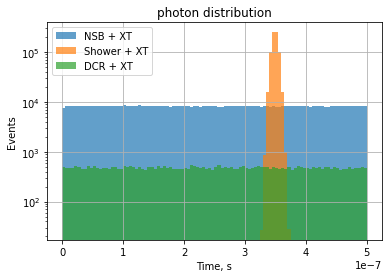

In [13]:
plt.hist(nsb_time, bins = 100, range = [0e-9, 500e-9], alpha = 0.7, label='NSB + XT')
plt.hist(signal_time, bins = 100, range = [0e-9, 500e-9], alpha = 0.7, label='Shower + XT')
plt.hist(dcr_time, bins = 100, range = [0e-9, 500e-9], alpha = 0.7, label='DCR + XT')
plt.grid()
plt.yscale('log')
plt.title('photon distribution')
plt.ylabel('Events')
plt.xlabel('Time, s')
plt.legend(loc=2)
plt.savefig('pulse_distibution.png', dpi = 200)

In [3]:
data_cross_ac_100ns_1px_short = get_waveforms_1px('/home/andrii/Terzina_sim/Pxt_020/3V_3.6e+07_short_template.root', 20, start = 120)

In [4]:
data_cross_ac_100ns_1px_long = get_waveforms_1px('/home/andrii/Terzina_sim/Pxt_020/3V_3.6e+07_long_template.root', 20, start = 120)

In [37]:
data_cross_ac_100ns_1px_long_10px = get_waveforms_1px('/home/andrii/work/DoAna/DoCalcNSB/v8_Terzina/3V_3.6e+07_Hz_0_AC_Compenstion_Off.root', 20, start = 60)

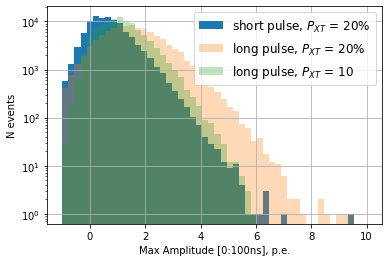

In [39]:
plt.hist(data_cross_ac_100ns_1px_short/5, bins = 50, range = [-1, 10], label='short pulse, $P_{XT}$ = 20%')
plt.hist(data_cross_ac_100ns_1px_long/5, bins = 50, range = [-1, 10], alpha = 0.3, label='long pulse, $P_{XT}$ = 20%')
plt.hist(data_cross_ac_100ns_1px_long_10px/5, bins = 50, range = [-1, 10], alpha = 0.3, label='long pulse, $P_{XT}$ = 10%')
plt.grid()
plt.yscale('log')
plt.xlabel("Max Amplitude [0:100ns], p.e.")
plt.ylabel("N events")
plt.legend(fontsize=12)
plt.savefig('max_amplitude_pxt.png', dpi=600)

In [20]:
thresholds = np.arange(0.1, 38., 0.2)

n_events_1pixels_all_ac_100ns_short = []
n_events_1pixels_all_ac_100ns_long = []
n_events_1pixels_all_ac_100ns_long_10pxt = []
n_events_1pixels_all_ac_100ns_signal_v2 = []


for i_th in thresholds:
    n_events_1pixels_all_ac_100ns_short.append( len(data_cross_ac_100ns_1px_short[data_cross_ac_100ns_1px_short>i_th]) )
    n_events_1pixels_all_ac_100ns_long.append( len(data_cross_ac_100ns_1px_long[data_cross_ac_100ns_1px_long>i_th]) )
    n_events_1pixels_all_ac_100ns_long_10pxt.append( len(data_cross_ac_100ns_1px_long_10px[data_cross_ac_100ns_1px_long_10px>i_th]) )
    #n_events_1pixels_all_ac_100ns.append( len(data_cross_ac_100ns_1px_nsb[data_cross_ac_100ns_1px_nsb>i_th]) )
    #n_events_1pixels_all_ac_100ns_signal.append( len(data_cross_ac_100ns_1px_signal[data_cross_ac_100ns_1px_signal>i_th]) )
    #n_events_1pixels_all_ac_100ns_signal_v2.append( len(data_cross_ac_100ns_1px_signal_v2[data_cross_ac_100ns_1px_signal_v2>i_th]) )

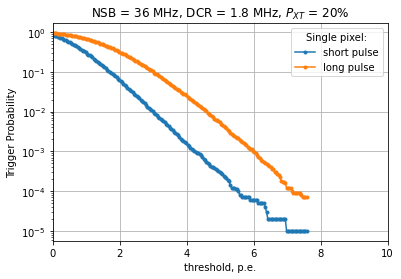

In [32]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_1px_short = np.array(n_events_1pixels_all_ac_100ns_short)/(len(data_cross_ac_100ns_1px_short))
y_data_ac_100ns_1px_long = np.array(n_events_1pixels_all_ac_100ns_long)/(len(data_cross_ac_100ns_1px_long))
y_data_ac_100ns_1px_long_10pxt = np.array(n_events_1pixels_all_ac_100ns_long_10pxt)/(len(data_cross_ac_100ns_1px_long_10px))

plt.plot(x_data, y_data_ac_100ns_1px_short, c = 'tab:blue', marker = '.', label='short pulse, $P_{XT}$ = 20%')
plt.plot(x_data, y_data_ac_100ns_1px_long, c = 'tab:orange', marker = '.', label='long pulse, $P_{XT}$ = 20%')
plt.plot(x_data, y_data_ac_100ns_1px_long_10pxt, c = 'tab:red', marker = '.', label='long pulse, $P_{XT}$ = 10%')
plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 5e8)
plt.xlim(0, 10)
plt.legend(title = 'Single pixel:')

plt.title('NSB = 36 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger Probability')
plt.xlabel('threshold, p.e.')
plt.savefig('trigger_probability_pxt.png', dpi = 200)

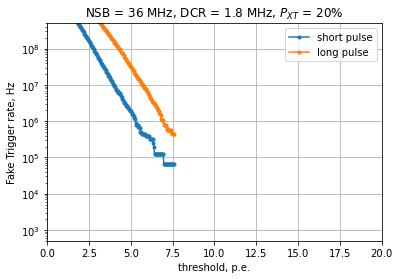

In [34]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9

dead_time = 0e-9

n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_1px_short = (n_pixels)*np.array(n_events_1pixels_all_ac_100ns_short)/(len(data_cross_ac_100ns_1px_short)*(read_out_window_100ns+dead_time))
y_data_ac_100ns_1px_long = (n_pixels)*np.array(n_events_1pixels_all_ac_100ns_long)/(len(data_cross_ac_100ns_1px_long)*(read_out_window_100ns+dead_time))
y_data_ac_100ns_1px_long_pxt = (n_pixels)*np.array(n_events_1pixels_all_ac_100ns_long_10pxt)/(len(data_cross_ac_100ns_1px_long_10px)*(read_out_window_100ns+dead_time))


plt.plot(x_data, y_data_ac_100ns_1px_short, c = 'tab:blue', marker = '.', label='short pulse, $P_{XT}$ = 20%')
plt.plot(x_data, y_data_ac_100ns_1px_long, c = 'tab:orange', marker = '.', label='long pulse, $P_{XT}$ = 20%')
plt.plot(x_data, y_data_ac_100ns_1px_long_10pxt, c = 'tab:red', marker = '.', label='long pulse, $P_{XT}$ = 10%')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 20)
plt.legend()

plt.title('NSB = 36 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Fake Trigger rate, Hz')
plt.xlabel('threshold, p.e.')
plt.savefig('fake_trigger_probability.png', dpi = 200)

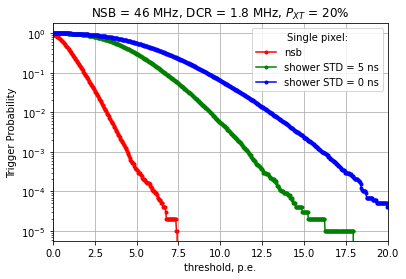

In [21]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_1px = (n_pixels)*np.array(n_events_1pixels_all_ac_100ns)/(len(data_cross_ac_100ns_1px_nsb)*read_out_window_100ns)
y_data_ac_100ns_1px = np.array(n_events_1pixels_all_ac_100ns)/(len(data_cross_ac_100ns_1px_nsb))
y_data_ac_100ns_1px_signal = np.array(n_events_1pixels_all_ac_100ns_signal)/(len(data_cross_ac_100ns_1px_signal))
y_data_ac_100ns_1px_signal_v2 = np.array(n_events_1pixels_all_ac_100ns_signal_v2)/(len(data_cross_ac_100ns_1px_signal_v2))


plt.plot(x_data, y_data_ac_100ns_1px,'r.-', label='nsb')
plt.plot(x_data, y_data_ac_100ns_1px_signal,'g.-', label='shower STD = 5 ns')
plt.plot(x_data, y_data_ac_100ns_1px_signal_v2,'b.-', label='shower STD = 0 ns')

plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 5e8)
plt.xlim(0, 20)
plt.legend(title = 'Single pixel:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger Probability')
plt.xlabel('threshold, p.e.')
plt.savefig('trigger_probability.png', dpi = 200)

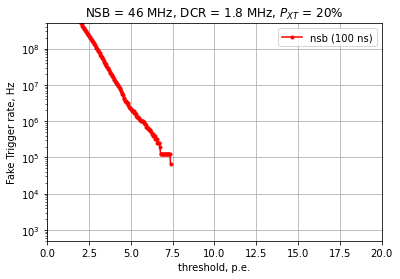

In [44]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9

dead_time = 0e-9

n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_1px = (n_pixels)*np.array(n_events_1pixels_all_ac_100ns)/(len(data_cross_ac_100ns_1px_nsb)*(read_out_window_100ns+dead_time))
y_data_ac_100ns_1px_ndt = (n_pixels)*np.array(n_events_1pixels_all_ac_100ns)/(len(data_cross_ac_100ns_1px_nsb)*(read_out_window_100ns))


plt.plot(x_data[:-3815], y_data_ac_100ns_1px[:-3815],'r.-', label='nsb (100 ns)')
#plt.plot(x_data, y_data_ac_100ns_1px_ndt,'r-', label='nsb (100 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 20)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Fake Trigger rate, Hz')
plt.xlabel('threshold, p.e.')
plt.savefig('fake_trigger_probability.png', dpi = 200)

In [33]:
len(x_data)

4000

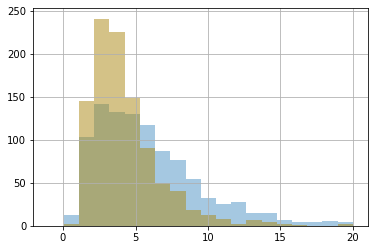

In [90]:
plt.hist(data_cross_ac_100ns_1px_nsb_nbs, bins = 20, range = [-1, 20], alpha = 0.4)
plt.hist(data_cross_ac_100ns_1px_nsb, bins = 20, range = [-1, 20], alpha = 0.4)
plt.hist(data_cross_ac_100ns_1px_nsb_new, bins = 20, range = [-1, 20], alpha = 0.2)
plt.grid()

(array([  71.,   94.,   77.,   76.,   73.,   86.,   98.,   85.,   90.,
          99.,   76.,   82.,   62.,   76.,   81.,  100.,   80.,   68.,
          91.,   88.,   81.,   57.,   90.,   94.,   84.,   74.,   80.,
          96.,   77.,   74.,   66.,   84.,   59.,   68.,   88.,  107.,
          83.,   77.,   90.,   83.,   71.,   90.,   80.,   67.,   98.,
          79.,  113.,   76.,   89.,  100.,   98.,   82.,   81.,  106.,
          85.,   71.,   74.,   72.,   90.,  106.,   88.,   62.,   91.,
          87.,   88.,   84.,   75.,  254., 1080., 2767., 2805., 1111.,
         282.,  108.,   93.,   75.,   78.,   93.,   86.,  104.,   94.,
          71.,   81.,  108.,   64.,   76.,   86.,   77.,   82.,   74.,
          86.,   95.,   85.,   97.,  103.,   85.,   72.,   75.,   92.,
          80.]),
 array([0.00e+00, 5.00e-09, 1.00e-08, 1.50e-08, 2.00e-08, 2.50e-08,
        3.00e-08, 3.50e-08, 4.00e-08, 4.50e-08, 5.00e-08, 5.50e-08,
        6.00e-08, 6.50e-08, 7.00e-08, 7.50e-08, 8.00e-08, 8.50e-08

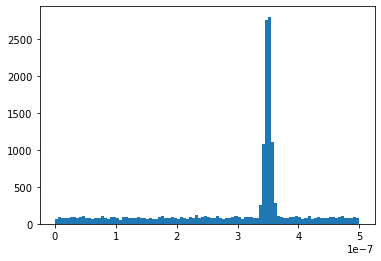

In [29]:
plt.hist(all_time, bins = 100, range = [0e-9, 500e-9])